This code visualize 10 Day Leaf Area Index Product of Landsaf for Turkiye Domain

In [1]:
import numpy as np
from netCDF4 import Dataset
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
input_dir="../input/"
output_dir="../output/"
latcorners = [33,45]
loncorners = [23,48]

In [3]:
flist_=glob.glob(input_dir+"NETCDF4_LSASAF_MSG_LAI-D10_MSG-Disk_*nc")

In [4]:
file=flist_[0]
file_ds=Dataset(file)
lai_lat=file_ds.variables["lat"][:]
lai_lon=file_ds.variables["lon"][:]
latli = np.argmin( np.abs( lai_lat - latcorners[0] ) )
latui = np.argmin( np.abs( lai_lat - latcorners[1] ) ) 

In [5]:
lonli = np.argmin( np.abs( lai_lon - loncorners[0] ) )
lonui = np.argmin( np.abs( lai_lon - loncorners[1] ) )  
trk_lai = file_ds.variables["LAI"][:,latui:latli,lonli:lonui]

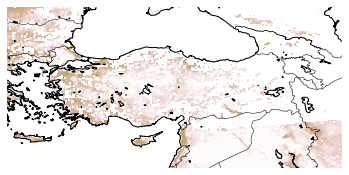

In [7]:
trk_masked=trk_lai.data[0]
trk_masked[np.where(trk_lai.mask[0]==True)]=np.nan
m = Basemap(resolution='h',\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[1],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[1])
m.drawcoastlines()
m.drawcountries()
m.imshow(trk_masked[::-1],vmin=.1,vmax=6.9,cmap="gist_earth_r")
jpeg_name=file.split("/")[-1].split(".")[0].split("_")[-1]
plt.axis('off')
plt.savefig(output_dir+"Turk_LAI_"+jpeg_name+".png", transparent=True,\
            dpi=200, bbox_inches='tight', pad_inches = 0)